<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#What-is-JSON?" data-toc-modified-id="What-is-JSON?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is JSON?</a></span></li><li><span><a href="#JSON-Format" data-toc-modified-id="JSON-Format-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>JSON Format</a></span></li></ul></li><li><span><a href="#Loading-a-JSON-File" data-toc-modified-id="Loading-a-JSON-File-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading a JSON File</a></span><ul class="toc-item"><li><span><a href="#Exploring-JSON-Schemas" data-toc-modified-id="Exploring-JSON-Schemas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploring JSON Schemas</a></span></li></ul></li><li><span><a href="#Loading-in-Plant-Data" data-toc-modified-id="Loading-in-Plant-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading in Plant Data</a></span><ul class="toc-item"><li><span><a href="#What-Information-Do-We-Have?" data-toc-modified-id="What-Information-Do-We-Have?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What Information Do We Have?</a></span></li><li><span><a href="#Plant-Families" data-toc-modified-id="Plant-Families-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plant Families</a></span></li><li><span><a href="#Synonyms" data-toc-modified-id="Synonyms-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Synonyms</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Bibliography</a></span></li></ul></li><li><span><a href="#Matching-Author-and-Bibliography" data-toc-modified-id="Matching-Author-and-Bibliography-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matching Author and Bibliography</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Year" data-toc-modified-id="Year-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Year</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li></ul></div>

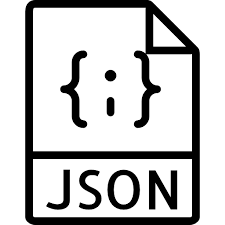

In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [2]:
!ls

05-python-review.ipynb
06-data-analysis-with-csvs.ipynb
07-data-analysis-with-json.ipynb
08-Introducing-Pandas-DataFrames.ipynb
09-plotting-with-pandas.ipynb
10-pandas-data-cleaning.ipynb
11-aggregating-combining-dataframes.ipynb
12-descriptive-stats.ipynb
completed
data
dsc-checkpoints
images
src


In [3]:
# Open File
with open ('./data/new_releases.json') as f:
    data = json.load(f)


The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [4]:
## This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [9]:
# One way to make it easier to read is by using the indent argument
print(json.dumps(data, indent=4))

{
    "albums": {
        "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
        "items": [
            {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
                        },
                        "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
                        "id": "1RyvyyTE3xzB2ZywiAwp0i",
                        "name": "Future",
                        "type": "artist",
                        "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AE",
                    "AR",
                    "AT",
                    "AU",
                    "BE",
                    "BG",
                    "BH",
                 

### Jupyter notebook has built-in "display" function which is very similar to json.dumps

In [7]:
# Using the default Jupyter Notebook's display() helps
display(data) # Uncomment this to do the same as just displaying the last line
# data


{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

### To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [10]:
# Type
type(data)

dict

In [12]:
# Total list of keys

data.keys()

dict_keys(['albums'])

### In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [13]:
# Check albums out -> also a dictionary
type(data['albums'])

dict

In [14]:
# Check the keys out
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](../images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [15]:
# Write for loop to look at the key and the data type
for i in data['albums'].keys():
    print("Name:", i)
    print("Type:", type(data['albums'][i]), '\n')
    
    



Name: href
Type: <class 'str'> 

Name: items
Type: <class 'list'> 

Name: limit
Type: <class 'int'> 

Name: next
Type: <class 'str'> 

Name: offset
Type: <class 'int'> 

Name: previous
Type: <class 'NoneType'> 

Name: total
Type: <class 'int'> 



Adding this to our diagram, we now have something like this:

![](../images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [18]:
# Check out the type -> dictionary
print(type(data["albums"]["items"][0]))

data['albums']['items'][0]

<class 'dict'>


{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

In [23]:
# Check an idividual record out
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

We access values as we would for nested lists or dictionaries in Python.

In [19]:
# Access the keys for the dictionary
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [26]:
data['albums']['items'][0]['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
 'id': '1RyvyyTE3xzB2ZywiAwp0i',
 'name': 'Future',
 'type': 'artist',
 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}

In [19]:
# Get the artist's name -> first album ['albums']['items'][0], ["artists"] key is a list with len == 1, who's idx=0

# data['albums']['items'][0]['artists'][0] is a dictionary, and the "name" key's value is the artists name

data['albums']['items'][0]['artists'][0]['name']

'Future'

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [27]:
# Load 'em up!
# use plants.json from the data folder
with open('./data/plants.json') as f:
    plants = json.load(f)

In [29]:
plts = json.dumps(plants, indent=4)
print(plts)

[
    {
        "id": 678281,
        "common_name": "Evergreen oak",
        "slug": "quercus-rotundifolia",
        "scientific_name": "Quercus rotundifolia",
        "year": 1785,
        "bibliography": "Encycl. 1: 723 (1785)",
        "author": "Lam.",
        "status": "accepted",
        "rank": "species",
        "family_common_name": "Beech family",
        "genus_id": 5778,
        "image_url": "https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30",
        "synonyms": [
            "Quercus lyauteyi",
            "Quercus rotundifolia f. crassicupulata",
            "Quercus ballota",
            "Quercus ilex f. brevicupulata",
            "Quercus calycina",
            "Quercus rotundifolia f. dolichocalyx",
            "Quercus rotundifolia f. pilosella",
            "Quercus rotundifolia f. macrocarpa",
            "Quercus rotundifolia f. calycina",
            "Quercus ilex f. macrocarpa",
            "Quercus ilex subsp. ballota",
            "Que

In [39]:
with open('./data/plants.json') as file:
    derp = json.load(file)

In [44]:
print(json.dumps(derp, indent=4))

[
    {
        "id": 678281,
        "common_name": "Evergreen oak",
        "slug": "quercus-rotundifolia",
        "scientific_name": "Quercus rotundifolia",
        "year": 1785,
        "bibliography": "Encycl. 1: 723 (1785)",
        "author": "Lam.",
        "status": "accepted",
        "rank": "species",
        "family_common_name": "Beech family",
        "genus_id": 5778,
        "image_url": "https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30",
        "synonyms": [
            "Quercus lyauteyi",
            "Quercus rotundifolia f. crassicupulata",
            "Quercus ballota",
            "Quercus ilex f. brevicupulata",
            "Quercus calycina",
            "Quercus rotundifolia f. dolichocalyx",
            "Quercus rotundifolia f. pilosella",
            "Quercus rotundifolia f. macrocarpa",
            "Quercus rotundifolia f. calycina",
            "Quercus ilex f. macrocarpa",
            "Quercus ilex subsp. ballota",
            "Que

In [50]:
family_dict = {}
for i in plants:
    if i["family_common_name"] not in family_dict.keys():
        family_dict[i["family_common_name"]] = 1
    else:
        family_dict[i["family_common_name"]] +=1
        
    
    
family_dict

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 None: 113,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge fa

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [22]:
# Type?
type(plants)

list

In [24]:
# Size?
len(plants)

1000

In [27]:
plants[0].keys()

dict_keys(['id', 'common_name', 'slug', 'scientific_name', 'year', 'bibliography', 'author', 'status', 'rank', 'family_common_name', 'genus_id', 'image_url', 'synonyms', 'genus', 'family', 'links'])

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [54]:
# Look at first one
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [47]:
plant_dict = defaultdict(int)
for plant in plants:
    plant_dict[plant['family_common_name']] += 1
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [56]:
# Create defaultdict
default_dict = {}
for i in range(len(plants)):
    if plants[i]["family_common_name"] not in default_dict:
        default_dict[plants[i]["family_common_name"]] = 1
    else:
        default_dict[plants[i]["family_common_name"]] += 1

default_dict       

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 None: 113,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge fa

In [30]:
# Fill default dictionary
len(default_dict)

103

In [59]:
# Check it out!
mode_list = []

for key, value in default_dict.items():
    if default_dict[key] == max(default_dict.values()):
        mode_list.append(f"Key: {key} | Value: {value}")

print(mode_list)

# The key None has the most entries
default_dict[None]

['Key: None | Value: 113']


113

In [60]:
# Specific entry
default_dict["Palm family"]

2

In [62]:
default_dict.get("Palm familee")

Are there any missing values?

In [33]:
# How to look for missing?
count = 0
for key, val in default_dict.items():
    if key == None or val == None:
        count += 1
print(count)

1


Let's remove these by using a dictionary comprehension:

In [63]:
# Dict comp!
comp_dict = {key: val for key, val in default_dict.items() if key != None}
len(comp_dict)

102

Let's also remove the families whose counts are less than ten:

In [77]:
for i in list(comp_dict.items())[:5]:
    print(i)

('Beech family', 10)
('Nettle family', 2)
('Grass family', 81)
('Plantain family', 25)
('Buttercup family', 21)


In [74]:
print([(key, val) if val >= 10 else (key, "wah wah") for key, val in comp_dict.items()])

[('Beech family', 10), ('Nettle family', 'wah wah'), ('Grass family', 81), ('Plantain family', 25), ('Buttercup family', 21), ('Pea family', 63), ('Olive family', 'wah wah'), ('Rose family', 49), ('Birch family', 'wah wah'), ('Rush family', 19), ('Buckwheat family', 17), ('Soapberry family', 'wah wah'), ('Pine family', 10), ('Mint family', 45), ('Madder family', 'wah wah'), ('Pink family', 31), ('Carrot family', 29), ('Geranium family', 10), ('Aster family', 80), ('Horsetail family', 'wah wah'), ('Heath family', 17), ('Loosestrife family', 'wah wah'), ('Bracken Fern family', 'wah wah'), ('Mustard family', 29), ('Evening Primrose family', 10), ('Willow family', 'wah wah'), ('Polypody family', 'wah wah'), ('Dogwood family', 'wah wah'), ('Honeysuckle family', 'wah wah'), ('Morning-glory family', 'wah wah'), ('Iris family', 'wah wah'), ('Spleenwort family', 'wah wah'), ('Amaranth family', 'wah wah'), ('Sedge family', 41), ('Buckthorn family', 'wah wah'), ('Holly family', 'wah wah'), ('Pota

In [70]:
for key, val in comp_dict.items():
    print(key, val)
    break

Beech family 10


In [37]:
# More comps!
less_ten = {key: val for key, val in comp_dict.items() if val >= 10}
len(less_ten)

23

Now we can make a bar chart of the numbers:

In [38]:
plt.style.use('seaborn')

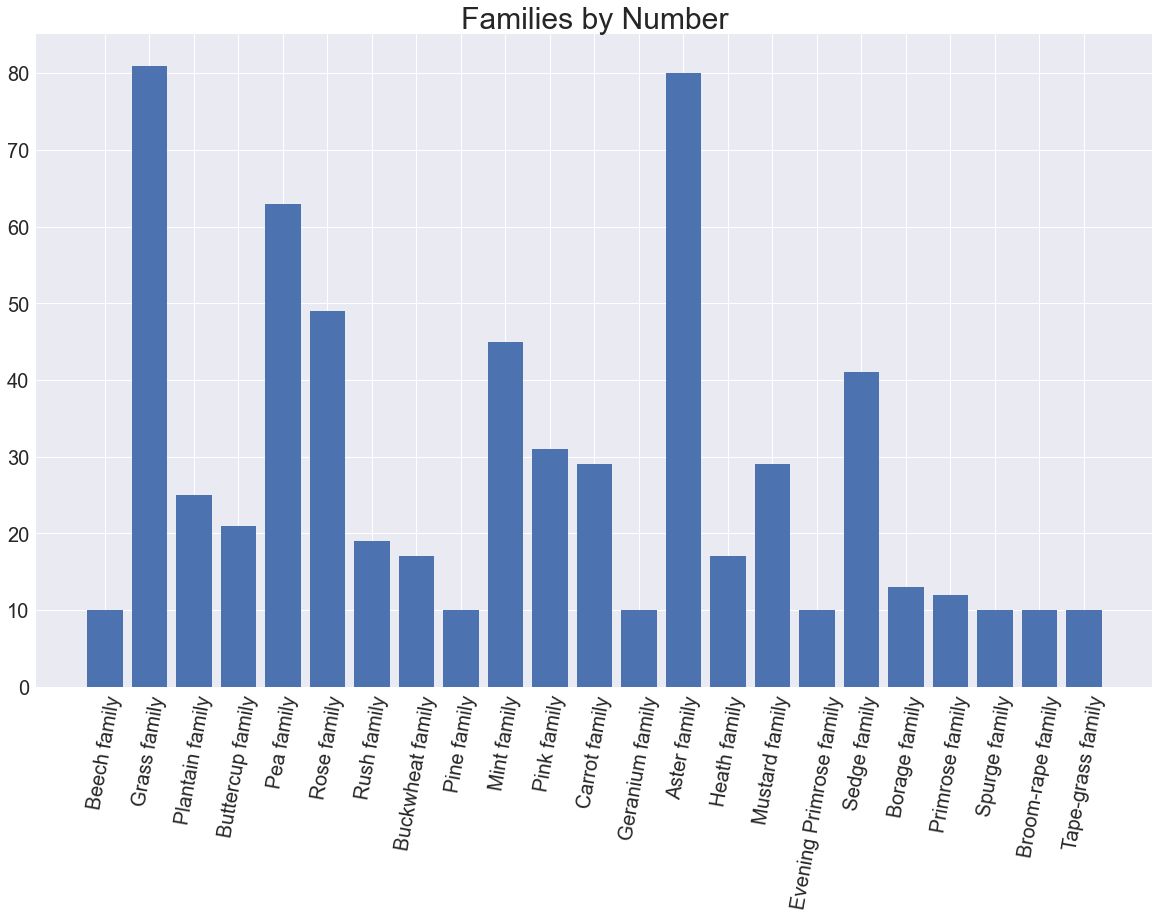

In [39]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=list(less_ten.keys()), height=list(less_ten.values()))
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

## Synonyms

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [40]:
num_syn = [len(i['synonyms']) for i in plants]


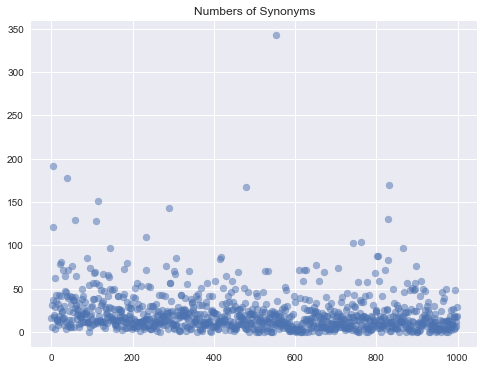

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [42]:
# Find it with a for loop
[len(i['synonyms']) for i in plants]
for i in plants:
    if len(i['synonyms']) > 300:
        print(i['common_name'], len(i['synonyms']))

Irish potato 342


In [43]:
# List comp?
[i["common_name"] for i in plants if len(i["synonyms"]) > 300]

['Irish potato']

## Bibliography

In [44]:
# Create a list with the bibliographies
data[0].keys()
bibs = [i['bibliography'] for i in plants]
len(bibs)

1000

In [93]:
# Check it out!
bibs[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [47]:
# Get rid of the nulls (None)
bibs_rm = [i for i in bibs if i != None]
len(bibs_rm)

994

In [48]:
# How many did we lose?
6

6

In [49]:
# Get a list of all those with Linnaeus
lin = [i for i in bibs_rm if "Linnaeus" in i]
lin

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [50]:
data[0]['bibliography'].startswith("Sp. Pl.")

False

In [54]:
# For loop!
sp_pl = []
for plant in plants:
    if plant['bibliography'] != None and plant['bibliography'].startswith("Sp. Pl."):
        sp_pl.append([plant['bibliography'], plant['author']])
len(sp_pl)
#sp_pl

445

In [58]:
# list comp?
[[i['bibliography'], i['author']] for i in plants if i['bibliography'] != None and i['bibliography'].startswith("Sp. Pl.")]

[['Sp. Pl.: 984 (1753)', 'L.'],
 ['Sp. Pl.: 71 (1753)', 'L.'],
 ['Sp. Pl.: 113 (1753)', 'L.'],
 ['Sp. Pl.: 996 (1753)', 'L.'],
 ['Sp. Pl.: 554 (1753)', 'L.'],
 ['Sp. Pl.: 1048 (1753)', 'L.'],
 ['Sp. Pl.: 767 (1753)', 'L.'],
 ['Sp. Pl.: 1057 (1753)', 'L.'],
 ['Sp. Pl.: 768 (1753)', 'L.'],
 ['Sp. Pl.: 554 (1753)', 'L.'],
 ['Sp. Pl.: 998 (1753)', 'L.'],
 ['Sp. Pl.: 998 (1753)', 'L.'],
 ['Sp. Pl.: 326 (1753)', 'L.'],
 ['Sp. Pl.: 28 (1753)', 'L.'],
 ['Sp. Pl.: 112 (1753)', 'L.'],
 ['Sp. Pl.: 1000 (1753)', 'L.'],
 ['Sp. Pl.: 67 (1753)', 'L.'],
 ['Sp. Pl.: 578 (1753)', 'L.'],
 ['Sp. Pl.: 477 (1753)', 'L.'],
 ['Sp. Pl.: 108 (1753)', 'L.'],
 ['Sp. Pl.: 269 (1753)', 'L.'],
 ['Sp. Pl.: 85 (1753)', 'L.'],
 ['Sp. Pl.: 249 (1753)', 'L.'],
 ['Sp. Pl.: 681 (1753)', 'L.'],
 ['Sp. Pl.: 475 (1753)', 'L.'],
 ['Sp. Pl.: 600 (1753)', 'L.'],
 ['Sp. Pl.: 67 (1753)', 'L.'],
 ['Sp. Pl.: 785 (1753)', 'L.'],
 ['Sp. Pl.: 886 (1753)', 'L.'],
 ['Sp. Pl.: 995 (1753)', 'L.'],
 ['Sp. Pl.: 242 (1753)', 'L.'],
 ['Sp. Pl.

In [59]:
# Get a list of the authors
aut = []
for i in sp_pl:
    aut.append(i[1])

aut
aut_set = set(aut)

In [60]:
# Make it unique!
aut_set

{'(J.Presl & C.Presl) Parl.',
 '(L.) L.',
 'A.Haines (Linnaeus)',
 'L.',
 None,
 'Willd.'}

In [61]:
aut.count("L.")

439

In [62]:
# Get a list of the counts of each author (hint: .count())
num_aut = []
for i in aut_set:
    num_aut.append(aut.count(i))

num_aut

[2, 1, 1, 1, 1, 439]

In [65]:
# zip it with unique authors and check it out
aut_dict = zip(aut_set, num_aut)
list(aut_dict)

[('(L.) L.', 2),
 (None, 1),
 ('Willd.', 1),
 ('A.Haines (Linnaeus)', 1),
 ('(J.Presl & C.Presl) Parl.', 1),
 ('L.', 439)]

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records in ```plants```. Remember, all these records start with 'Sp. Pl.'

In [135]:
print(list(aut_dict))

[('(J.Presl & C.Presl) Parl.', 1), ('A.Haines (Linnaeus)', 1), ('(L.) L.', 2), (None, 1), ('L.', 439), ('Willd.', 1)]


In [68]:
for plant in plants:
    try:
        if plant['bibliography'].startswith("Sp. Pl"):
            plant['author'] = "L."
    except:
        continue

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

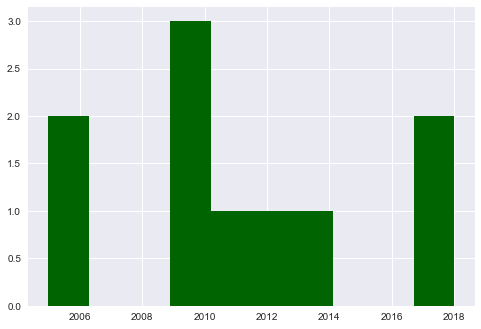

In [70]:
plants_df = pd.DataFrame(data)

fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 2003]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? 

In [ ]:
# Your Code